In [108]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
#from sklearn import cross_validation
from sklearn import metrics 
#from pandas import DataFrame

In [109]:
# Загрузка и обзор данных
# 1
iris = datasets.load_iris()
print(iris.feature_names)
print (iris.data[:10])
print (iris.target_names)
print (iris['target'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [110]:
# 2
iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.map(lambda x : iris.target_names[x])
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


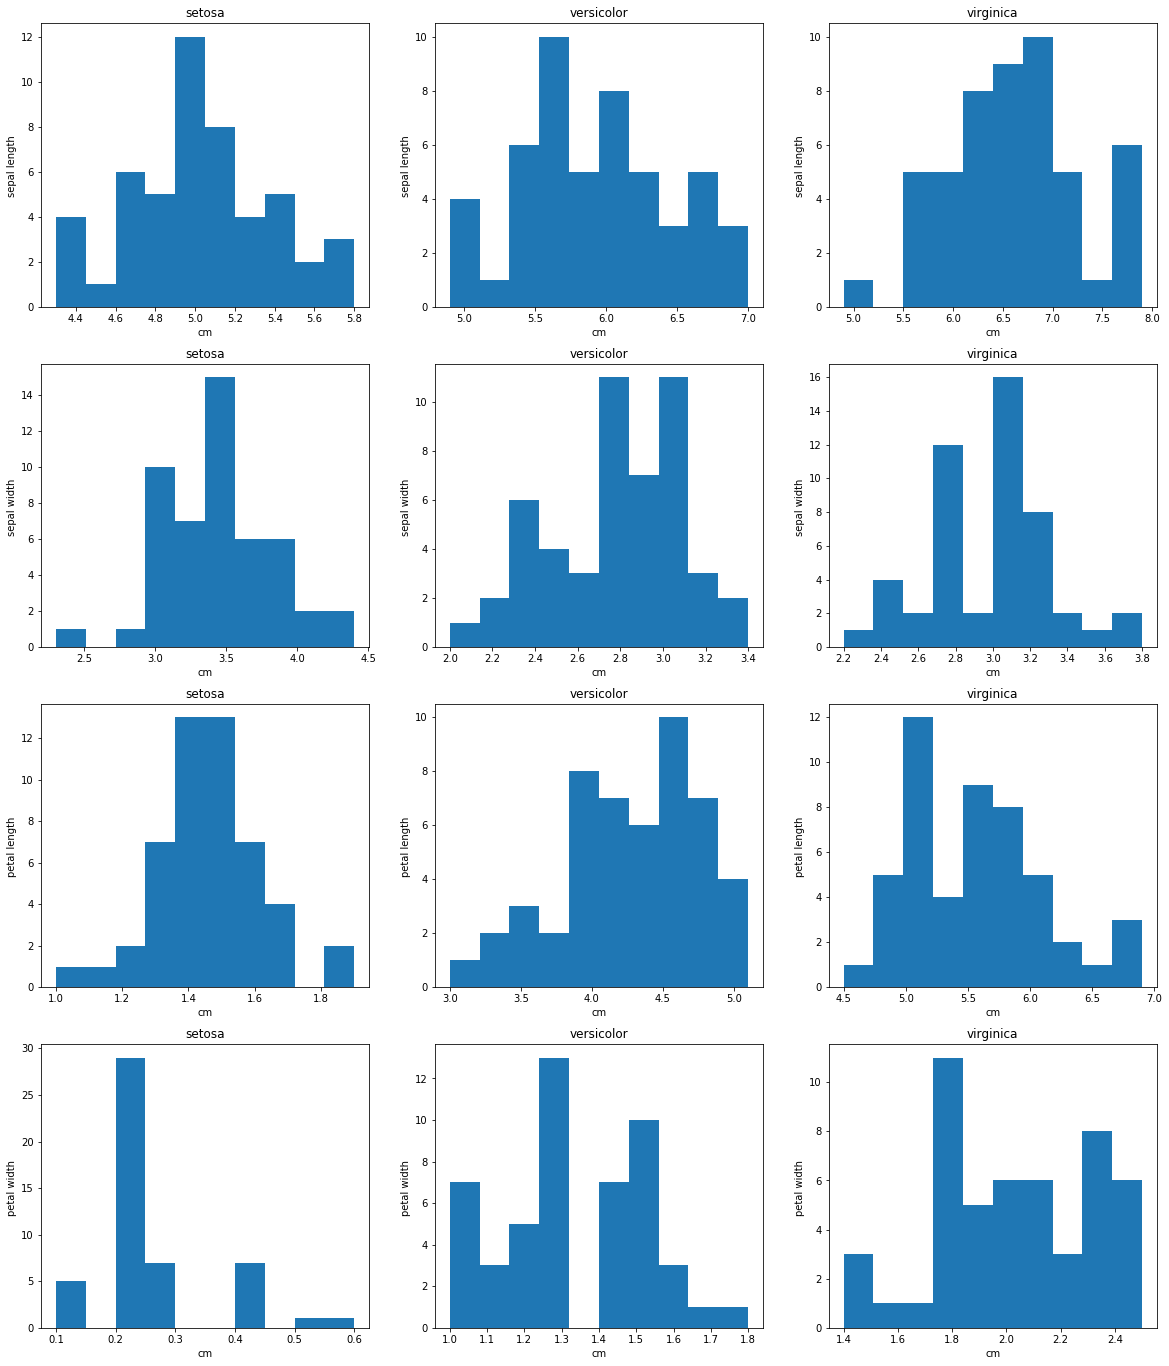

In [111]:
# 3
import matplotlib.pyplot as pyplot

pyplot.figure(figsize = (20, 24))
plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_frame[iris_frame.name == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

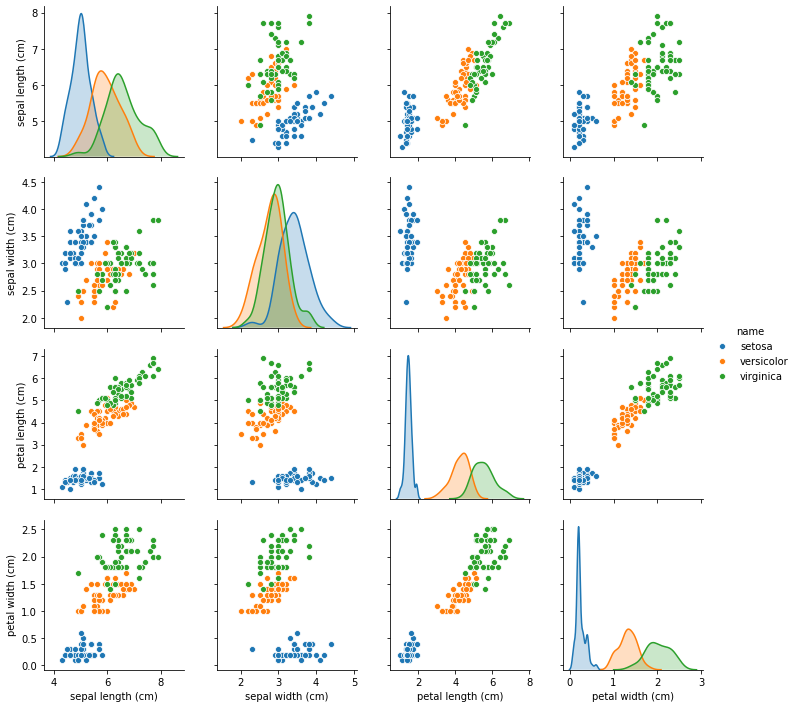

In [112]:
import seaborn as sns

sns.pairplot(iris_frame.iloc[:,[0,1,2,3,5]], hue = 'name')

In [113]:
# 4
iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)',
            'petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [114]:
iris_frame.groupby(['name','target']).corr()

sepal length (cm)  sepal width (cm)  \
name       target                                                          
setosa     0      sepal length (cm)           1.000000          0.742547   
                  sepal width (cm)            0.742547          1.000000   
                  petal length (cm)           0.267176          0.177700   
                  petal width (cm)            0.278098          0.232752   
versicolor 1      sepal length (cm)           1.000000          0.525911   
                  sepal width (cm)            0.525911          1.000000   
                  petal length (cm)           0.754049          0.560522   
                  petal width (cm)            0.546461          0.663999   
virginica  2      sepal length (cm)           1.000000          0.457228   
                  sepal width (cm)            0.457228          1.000000   
                  petal length (cm)           0.864225          0.401045   
                  petal width (cm)            0.281108          0.537728   

                                     petal length (cm)  petal width (cm)  
name       target                                                         
setosa     0      sepal length (cm)           0.267176          0.278098  
                  sepal width (cm)            0.177700          0.232752  
                  petal length (cm)           1.000000          0.331630  
                  petal width (cm)            0.331630          1.000000  
versicolor 1      sepal length (cm)           0.754049          0.546461  
                  sepal width (cm)            0.560522          0.663999  
                  petal length (cm)           1.000000          0.786668  
                  petal width (cm)            0.786668          1.000000  
virginica  2      sepal length (cm)           0.864225          0.281108  
                  sepal width (cm)            0.401045          0.537728  
                  petal length (cm)           1.000000          0.322108  
                  petal width (cm)            0.322108          1.000000

In [115]:
# Применение алгоритмов

from sklearn import svm, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

def make_meshgrid(x, y, h=.02):
    d = 5
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

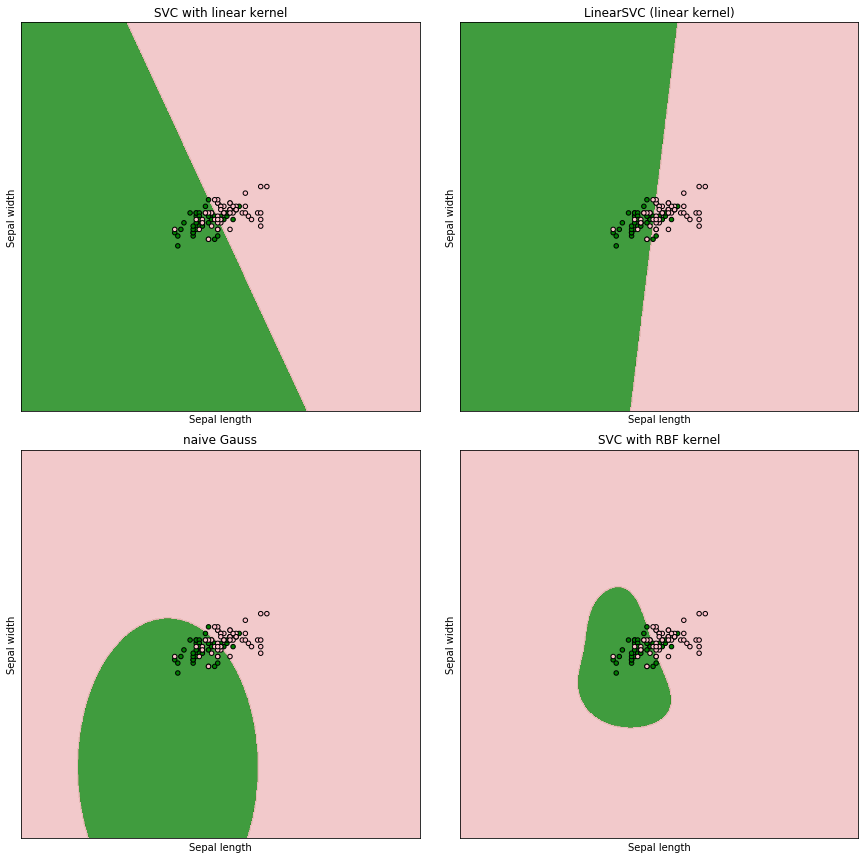

In [122]:
import matplotlib
# import some data to play with

#X = iris.data[:, :2]
#y = iris.target

# 1
X = iris.data[iris.target!=0, :2]
y = iris.target[iris.target!=0]

# 2
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          GaussianNB(),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'naive Gauss',
          'SVC with RBF kernel',
          'LinearDiscriminantAnalysis',
          'SVC with polynomial (degree 2) kernel')


fig, sub = pyplot.subplots(2, 2,figsize=(15,15))
pyplot.subplots_adjust(wspace=0.1, hspace=0.1)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['green', 'pink'])

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=cmap, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=cmap, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

pyplot.show()

In [117]:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [118]:
st = iris_frame.groupby('target').agg(['mean','std']).T
st

target                         0         1         2
sepal length (cm) mean  5.006000  5.936000  6.588000
                  std   0.352490  0.516171  0.635880
sepal width (cm)  mean  3.428000  2.770000  2.974000
                  std   0.379064  0.313798  0.322497
petal length (cm) mean  1.462000  4.260000  5.552000
                  std   0.173664  0.469911  0.551895
petal width (cm)  mean  0.246000  1.326000  2.026000
                  std   0.105386  0.197753  0.274650

In [119]:
'''
from scipy.stats import norm

def cond_prob(x,mean1,std1,mean2,std2):
    p1 = norm.pdf(x,mean1,std1)
    p2 = norm.pdf(x,mean2,std2)
    return p1/(p1+p2)

st.loc[(0,'mean')]

xx0, xx1 = np.meshgrid(np.arange(0, 12, 0.1),np.arange(-2, 8, 0.1))
pp0 = cond_prob(xx0,st.loc[(0,'mean'),1],st.loc[(0,'std'),1],st.loc[(0,'mean'),2],st.loc[(0,'std'),2])
pp1 = cond_prob(xx1,st.loc[(1,'mean'),1],st.loc[(1,'std'),1],st.loc[(1,'mean'),2],st.loc[(1,'std'),2])

zz = np.log(pp0) - np.log(1.0-pp0) + np.log(pp1) - np.log(1.0-pp1)
plt.contourf(xx0, xx1, zz)
'''

"\nfrom scipy.stats import norm\n\ndef cond_prob(x,mean1,std1,mean2,std2):\n    p1 = norm.pdf(x,mean1,std1)\n    p2 = norm.pdf(x,mean2,std2)\n    return p1/(p1+p2)\n\nst.loc[(0,'mean')]\n\nxx0, xx1 = np.meshgrid(np.arange(0, 12, 0.1),np.arange(-2, 8, 0.1))\npp0 = cond_prob(xx0,st.loc[(0,'mean'),1],st.loc[(0,'std'),1],st.loc[(0,'mean'),2],st.loc[(0,'std'),2])\npp1 = cond_prob(xx1,st.loc[(1,'mean'),1],st.loc[(1,'std'),1],st.loc[(1,'mean'),2],st.loc[(1,'std'),2])\n\nzz = np.log(pp0) - np.log(1.0-pp0) + np.log(pp1) - np.log(1.0-pp1)\nplt.contourf(xx0, xx1, zz)\n"